# 30일차

## 신경망

### 연습문제
- 미니배치는 입력데이터를 여러 조각으로 나누어 각자 훈련시키는 것이다.
- 행복데이터에서 배치 크기를 64로 해서 각 배치의 출력값과 오차값을 계산해보자. (배치를 자르기 전에 먼저 데이터를 섞어야 한다.)
- 주요 속성 6개를 입력값으로, 행복지수를 출력값으로 하는 회귀 문제이다.
- 중간층은 하나이며 256개의 노드를 가진다. 중간층의 활성화 함수는 시그모이드이다.
- 가능하면 입력데이터를 정규화한다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
happy=pd.read_csv('world_happiness_report_2021.csv')
happy.shape

(149, 20)

In [3]:
X=happy.iloc[:,6:12].values
y=happy['Ladder score'].values

In [4]:
idx=np.random.permutation(range(149))
idx

array([ 89, 133,  67,  18,  73,  97, 143, 144, 113,  81,  79, 146,   2,
        76, 119, 140,  70,  43,  33,  75,  19,  96,  63,  47, 104,  35,
       137, 116,  13,  69,  54,  16, 128,  65,  28,  91, 120, 122,  41,
         9,  36,  11,  84,  12,  49,  83,  26,  55, 138,  58,  10, 117,
        31,   1, 134, 110,  71,  23,  57, 147,  20,  61,  78, 111,  72,
       109,  34, 103, 130, 106, 135, 127,  53,  37,  25,   7,  17, 118,
       139,  15,  56, 101,  22,  38,  50,  51,  86, 145, 131, 108,  93,
        85, 142,   4,  66,  30,  52,  48,  62,  94,  77, 102, 125,  87,
       115,  80, 124,  21,  24,  45,  39,  95,  14,   0, 100,  99,  40,
         5, 129,  44, 132, 141,   3,  60,  68, 123, 148, 126, 114, 121,
        42, 105,  92,  59,   8,  27,  46,   6,  88,  82, 107, 112,  32,
        74,  29, 136,  98,  90,  64])

In [7]:
X1=X[idx[:64]]
y1=y[idx[:64]]
X1=(X1-X1.mean(axis=0))/X1.std(axis=0)

In [6]:
X2=X[idx[64:128]]
y2=y[idx[64:128]]
X2=(X2-X2.mean(axis=0))/X2.std(axis=0)

In [8]:
X3=X[idx[128:]]
y3=y[idx[128:]]
X3=(X3-X3.mean(axis=0))/X3.std(axis=0)

In [9]:
import tensorflow as tf
from tensorflow import keras

In [10]:
tf.nn.relu([-3,-2,-1,0,1,2,3])

<tf.Tensor: shape=(7,), dtype=int32, numpy=array([0, 0, 0, 0, 1, 2, 3])>

In [12]:
tf.math.sin(0.).numpy()

0.0

### MNIST 경사하강법 적용

In [13]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()
X_train.shape,y_train.shape,X_test.shape,y_test.shape

11493376/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [14]:
X_train.min(),X_train.max()

(0, 255)

Text(0.5, 1.0, '5')

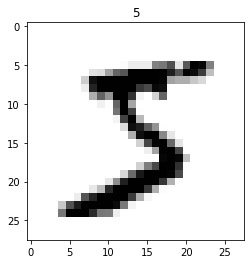

In [15]:
plt.imshow(X_train[0],cmap='gray_r',vmin=0,vmax=255)
plt.title(y_train[0])

In [16]:
X_train=X_train.reshape(-1,28*28)/255
X_test=X_test.reshape(-1,28*28)/255
X_train.shape,X_test.shape

((60000, 784), (10000, 784))

In [29]:
# 가중치 초기화
W=tf.Variable(np.random.normal(0,0.1,size=[784,10]))
b=tf.Variable(np.zeros(10))

In [18]:
pred_y=tf.nn.softmax(X_train@W+b)
pred_y

<tf.Tensor: shape=(60000, 10), dtype=float64, numpy=
array([[0.06457323, 0.088207  , 0.09379576, ..., 0.03754191, 0.06763539,
        0.3292972 ],
       [0.04712078, 0.17312135, 0.08276292, ..., 0.01070799, 0.10871429,
        0.13007382],
       [0.11083919, 0.08990058, 0.05844288, ..., 0.11467887, 0.01792909,
        0.40573079],
       ...,
       [0.13123438, 0.04241704, 0.03760423, ..., 0.04842362, 0.16071272,
        0.23585718],
       [0.0363834 , 0.17145077, 0.1254504 , ..., 0.04064134, 0.1141165 ,
        0.14325198],
       [0.15675023, 0.12156284, 0.03439759, ..., 0.020586  , 0.06641229,
        0.21616103]])>

In [27]:
y_oneshot=np.eye(10)[y_train]
eps=np.finfo(float).eps
lr=0.001
losses=[]
for epoch in range(1000):
    with tf.GradientTape() as tape:
        pred_y=tf.nn.softmax(X_train@W+b)
        # categorical cross-entropy:-log(p)
        loss=tf.reduce_sum(-y_oneshot*tf.math.log(pred_y+eps))/len(y_train)
    W_grads,b_grads=tape.gradient(loss,[W,b])
    
    W.assign_sub(lr*W_grads)
    b.assign_sub(lr*b_grads)
    losses.append(loss.numpy())
    print(epoch,loss.numpy())

0 2.559592805438929
1 2.557433512319234
2 2.5552858026979113
3 2.553149542409012
4 2.551024599343243
5 2.548910843409527
6 2.5468081464973946
7 2.544716382440174
8 2.542635426978972
9 2.5405651577274257
10 2.538505454137199
11 2.5364561974642186
12 2.534417270735628
13 2.532388558717432
14 2.5303699478828414
15 2.5283613263812783
16 2.526362584008028
17 2.5243736121745446
18 2.522394303879371
19 2.5204245536796677
20 2.5184642576633443
21 2.516513313421767
22 2.5145716200230344
23 2.5126390779858134
24 2.5107155892537167
25 2.508801057170209
26 2.5068953864540275
27 2.5049984831751226
28 2.503110254731079
29 2.5012306098240265
30 2.4993594584380245
31 2.4974967118169045
32 2.495642282442571
33 2.493796084013734
34 2.4919580314250798
35 2.4901280407468604
36 2.4883060292048937
37 2.4864919151609692
38 2.4846856180936436
39 2.4828870585794243
40 2.481096158274323
41 2.479312839895785
42 2.47753702720497
43 2.4757686449893876
44 2.4740076190458766
45 2.4722538761639146
46 2.47050734410926

KeyboardInterrupt: 

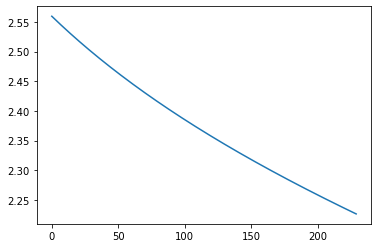

In [28]:
plt.plot(losses)

In [30]:
# 가중치 초기화
W=tf.Variable(np.random.normal(0,0.1,size=[784,10]))
b=tf.Variable(np.zeros(10))

y_oneshot=np.eye(10)[y_train]
eps=np.finfo(float).eps
lr=0.001
losses=[]

for epoch in range(100):
    for batch in range(600): #batch_size=100
        with tf.GradientTape() as tape:
            pred_y=tf.nn.softmax(X_train[batch*100:(batch+1)*100]@W+b)
            # categorical cross-entropy:-log(p)
            
            loss=tf.reduce_sum(-y_oneshot[batch*100:(batch+1)*100]*tf.math.log(pred_y+eps))/len(y_train)
        W_grads,b_grads=tape.gradient(loss,[W,b])
    
        W.assign_sub(lr*W_grads)
        b.assign_sub(lr*b_grads)
    losses.append(loss.numpy())
    print(epoch,loss.numpy())

0 0.00431578492132879
1 0.004313306867747228
2 0.004310836622344495
3 0.004308374125845143
4 0.004305919319595509
5 0.004303472145555462
6 0.004301032546290253
7 0.004298600464962519
8 0.004296175845324401
9 0.004293758631709798
10 0.004291348769026744
11 0.004288946202749896
12 0.004286550878913159
13 0.004284162744102414
14 0.00428178174544837
15 0.0042794078306195235
16 0.004277040947815234
17 0.0042746810457589


KeyboardInterrupt: 

### Keras

In [32]:
from tensorflow import keras
keras.optimizers.RMSprop

tensorflow.python.keras.optimizer_v2.rmsprop.RMSprop

In [38]:
model=keras.models.Sequential()
model.add(keras.layers.Dense(10,input_shape=(784,),activation='softmax'))

In [39]:
model.compile(loss='categorical_crossentropy',optimizer='sgd')
y_oneshot=np.eye(10)[y_train]
model.fit(X_train,y_oneshot,batch_size=100,epochs=100)

Epoch 1/100
600/600 [==============================] - 1s 692us/step - loss: 1.5816
Epoch 2/100
600/600 [==============================] - 0s 662us/step - loss: 0.6970
Epoch 3/100
600/600 [==============================] - 1s 835us/step - loss: 0.5586
Epoch 4/100
600/600 [==============================] - 1s 865us/step - loss: 0.4980
Epoch 5/100
600/600 [==============================] - 1s 899us/step - loss: 0.4668
Epoch 6/100
600/600 [==============================] - 1s 896us/step - loss: 0.4369
Epoch 7/100
600/600 [==============================] - 0s 774us/step - loss: 0.4207
Epoch 8/100
600/600 [==============================] - 0s 713us/step - loss: 0.4042
Epoch 9/100
600/600 [==============================] - 0s 668us/step - loss: 0.3959
Epoch 10/100
600/600 [==============================] - 0s 756us/step - loss: 0.3883
Epoch 11/100
600/600 [==============================] - 1s 896us/step - loss: 0.3808
Epoch 12/100
600/600 [==============================] - 1s 892us/step - lo

600/600 [==============================] - 0s 738us/step - loss: 0.2821
Epoch 98/100
600/600 [==============================] - 0s 738us/step - loss: 0.2821
Epoch 99/100
600/600 [==============================] - 0s 745us/step - loss: 0.2839
Epoch 100/100
600/600 [==============================] - 0s 728us/step - loss: 0.2738


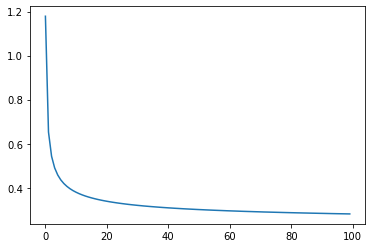

In [40]:
h=model.history.history
plt.plot(h['loss'])